权重初始化

好的初始化可以：1.加快梯度下降，模型收敛
           2.减小梯度下降收敛过程中训练（泛化）出现误差的 几率

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from init_utils import sigmoid, relu, compute_loss, forward_propagation, backward_propagation
from init_utils import update_parameters, predict, load_dataset, plot_decision_boundary, predict_dec

plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

train_X, train_Y, test_X, test_Y = load_dataset()

神经网络模型

尝试以下初始化方法
1.零初始化 ：在输入参数中设置initialization = "zeros"。
2.随机初始化 ：在输入参数中设置initialization = "random"，这会将权重初始化为较大的随机值。
3.He初始化 ：在输入参数中设置initialization = "he"，这会根据He等人（2015）的论文将权重初始化为按比例缩放的随机值。

In [11]:
def model(X, Y, learning_rate = 0.01, num_iterations = 15000, print_cost = True, initialization = "he"):
    '''
    Implements a three-layer neural network: linear->relu->linear->relu->linear->sigmoid
    '''
    
    grads = { }
    costs = [ ]
    m = X.shape[1] # number of examples
    layers_dims = [X.shape[0], 10, 5, 1] # dimension of layers
    
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)
    
    for i in range(0, num_iterations):
        a3, cache = forward_propagation(X, parameters)
        cost = compute_loss(a3, Y)
        
        grads = backward_propagation(X, Y, cache)
        
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {} : {}".format(i, cost))
            costs.append(cost)
        
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()
        
    return parameters

零初始化

将所有参数初始化为零
权重矩阵(W[1], W[2],......,W[l])
偏差向量(b[1], b[2],......,b[l])

In [12]:
def initialize_parameters_zeros(layers_dims):
    '''
    Arguments:
    layer_dims -- python array(list) containing the size of each layer
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1"...
    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    '''
    parameters = { }
    L = len(layers_dims) # number of layers in the network
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.zeros((layers_dims[l], layers_dims[l-1]))
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
    
    return parameters

In [4]:
parameters = initialize_parameters_zeros([3,2,1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[0. 0. 0.]
 [0. 0. 0.]]
b1 = [[0.]
 [0.]]
W2 = [[0. 0.]]
b2 = [[0.]]


使用零初始化并迭代15000次训练模型

Cost after iteration 0 : 0.6931471805599453
Cost after iteration 1000 : 0.6931471805599453
Cost after iteration 2000 : 0.6931471805599453
Cost after iteration 3000 : 0.6931471805599453
Cost after iteration 4000 : 0.6931471805599453
Cost after iteration 5000 : 0.6931471805599453
Cost after iteration 6000 : 0.6931471805599453
Cost after iteration 7000 : 0.6931471805599453
Cost after iteration 8000 : 0.6931471805599453
Cost after iteration 9000 : 0.6931471805599453
Cost after iteration 10000 : 0.6931471805599455
Cost after iteration 11000 : 0.6931471805599453
Cost after iteration 12000 : 0.6931471805599453
Cost after iteration 13000 : 0.6931471805599453
Cost after iteration 14000 : 0.6931471805599453


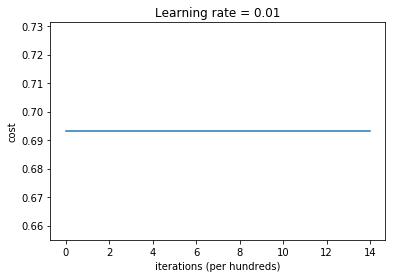

On the train set : 
Accuracy: 0.5
On the test set : 
Accuracy: 0.5


In [13]:
parameters = model(train_X, train_Y, initialization = "zeros")
print("On the train set : ")
predictions_train = predict(train_X, train_Y, parameters)
print("On the test set : ")
predictions_test = predict(test_X, test_Y, parameters)

性能很差，损失没有真正降低，该算法性能甚至都不如随机猜测，让我们看一下预测的详细信息和决策边界

In [14]:
print("predictions_train = " + str(predictions_train))
print ("predictions_test = " + str(predictions_test))

predictions_train = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]]
predictions_test = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


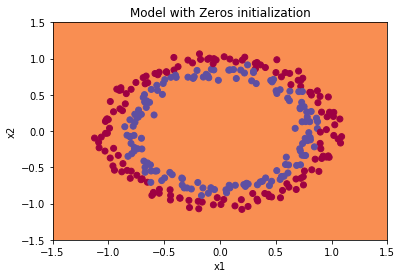

In [15]:
plt.title("Model with Zeros initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

通常，将所有权重初始化为零会导致网络无法打破对称性，这意味着每一层中的每个神经元都将学习相同的东西。
权重W[l]应随机初始化以打破对称性
偏差b[l]初始化为零是可以的，只要随机初始化了w[l]，对称性仍然会破坏

随机初始化

为了打破对称性，让我们随机设置权重。在随机初始化之后，每个神经元可以继续学习期输入的不同特征。

In [16]:
def initialize_parameters_random(layers_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims)
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l],layers_dims[l-1])*10
        parameters['b' + str(l)] = np.zeros((layers_dims[l],1))
    
    return parameters

In [17]:
parameters = initialize_parameters_random([3, 2, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 17.88628473   4.36509851   0.96497468]
 [-18.63492703  -2.77388203  -3.54758979]]
b1 = [[0.]
 [0.]]
W2 = [[-0.82741481 -6.27000677]]
b2 = [[0.]]


E:\Program Files\python\jupyter notebook\Andrew NG Deep Learning Code\吴恩达《深度学习》L2W1作业\L2W1作业1\init_utils.py:145: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
E:\Program Files\python\jupyter notebook\Andrew NG Deep Learning Code\吴恩达《深度学习》L2W1作业\L2W1作业1\init_utils.py:145: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Cost after iteration 0 : inf
Cost after iteration 1000 : 0.6239567039908781
Cost after iteration 2000 : 0.5978043872838292
Cost after iteration 3000 : 0.563595830364618
Cost after iteration 4000 : 0.5500816882570866
Cost after iteration 5000 : 0.5443417928662615
Cost after iteration 6000 : 0.5373553777823036
Cost after iteration 7000 : 0.4700141958024487
Cost after iteration 8000 : 0.3976617665785177
Cost after iteration 9000 : 0.39344405717719166
Cost after iteration 10000 : 0.39201765232720626
Cost after iteration 11000 : 0.38910685278803786
Cost after iteration 12000 : 0.38612995897697244
Cost after iteration 13000 : 0.3849735792031832
Cost after iteration 14000 : 0.38275100578285265


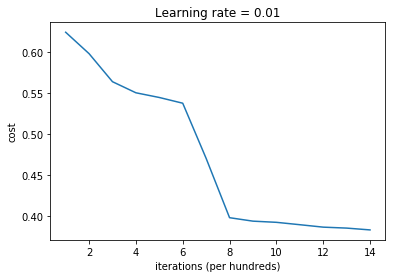

On the train set:
Accuracy: 0.83
On the test set:
Accuracy: 0.86


In [18]:
parameters = model(train_X, train_Y, initialization = "random")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

In [19]:
print (predictions_train)
print (predictions_test)

[[1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1
  1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0
  0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0
  1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0
  0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1
  1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1
  0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1
  1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1
  1 1 1 1 0 0 0 1 1 1 1 0]]
[[1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1
  0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0
  1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0]]


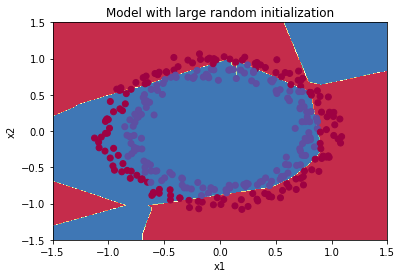

In [20]:
plt.title("Model with large random initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

1.损失一开始很高是因为较大的随机权重值，对于某些数据，最后一层激活函数sigmoid输出的结果非常接近0或1，并且当该示例数据预测错误时，将导致非常高的损失。
2.初始化不当会导致梯度消失/爆炸，同时也会减慢优化算法的速度。
3.训练较长时间的网络，将会看到更好的结果，但是使用太大的随机数进行初始化会降低优化速度。

He初始化

In [21]:
def initialize_parameters_he(layers_dims):
    
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims) - 1 
     
    for l in range(1, L + 1):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l],layers_dims[l-1])*np.sqrt(2./layers_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l],1))
        
    return parameters


In [22]:
parameters = initialize_parameters_he([2, 4, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 1.78862847  0.43650985]
 [ 0.09649747 -1.8634927 ]
 [-0.2773882  -0.35475898]
 [-0.08274148 -0.62700068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.03098412 -0.33744411 -0.92904268  0.62552248]]
b2 = [[0.]]


Cost after iteration 0 : 0.8830537463419761
Cost after iteration 1000 : 0.6879825919728063
Cost after iteration 2000 : 0.6751286264523371
Cost after iteration 3000 : 0.6526117768893807
Cost after iteration 4000 : 0.6082958970572938
Cost after iteration 5000 : 0.5304944491717495
Cost after iteration 6000 : 0.4138645817071794
Cost after iteration 7000 : 0.3117803464844441
Cost after iteration 8000 : 0.23696215330322562
Cost after iteration 9000 : 0.18597287209206836
Cost after iteration 10000 : 0.15015556280371817
Cost after iteration 11000 : 0.12325079292273552
Cost after iteration 12000 : 0.09917746546525932
Cost after iteration 13000 : 0.08457055954024274
Cost after iteration 14000 : 0.07357895962677362


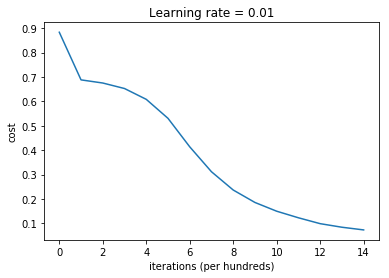

On the train set:
Accuracy: 0.9933333333333333
On the test set:
Accuracy: 0.96


In [23]:
parameters = model(train_X, train_Y, initialization = "he")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

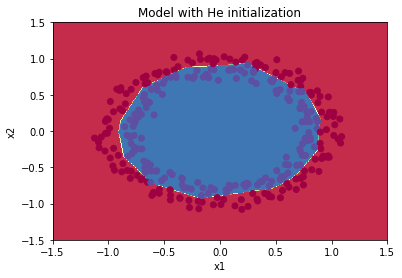

In [24]:
plt.title("Model with He initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

使用He初始化的模型可以在少量迭代中很好地分离蓝色点和红色点。